# Intorduction to Neural Network Classifacation using TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem

A classification problem is where you try to classify sometime as one thing or other.
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating Data to View and Fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples=n_samples,
    noise=.03,
    random_state=42
)

In [4]:
# Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hards to understand right now...so let's visualize

In [6]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

/tmp/ipykernel_9632/44116068.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [24]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

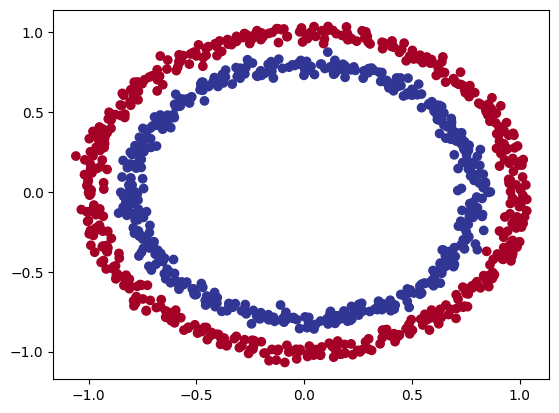

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [9]:
## Check the shapes of your features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are Typically:

1. Create or import a model
2. Compile the model
3. Fit the model

In [16]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [18]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


32/32 [==============================] - 1s 1ms/step - loss: 6.1494 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1457 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1440 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1335 - accuracy: 0.4880
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1198 - accuracy: 0.4890


In [20]:
# Let's try and train the model for longer time...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 888us/step - loss: 0.8126 - accuracy: 0.4930


[0.8125845789909363, 0.49300000071525574]

Since out model is working on Binary Classification problem and our model is getting ~50% accuracy... it's performing as if it is guessing.

So let's add an extra layer to improve out model

In [22]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

In [23]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 896us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933318376541138, 0.5]

In [25]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improve our model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer
2. Compile a model - we might want to choose a different Optimisation function such as Adam instead of SGD()
3. Fit a model - we might fit our model for more epochs, leave it training for longer

In [28]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=200, verbose=0)

In [29]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933543682098389, 0.5]

To visualize the models prediction let's create a function 'plot_decision_boundary()', this function will:

* Take trained model with features(X) and labels(y)
* Create a meshgrid of the different X values and make predictions across the meshgrid
* Plot the predictions as well as a line between zons (where each unique class falls)  

In [32]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predecting on X.
    """

    # Define the axis boundary on plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X values (We are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]    # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass classification 
    if len(y_pred[0]) > 1:
        print("doing milticlass classification")

        # We need to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")

        # Reshape the predictions to get them ready for plotting
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

118/313 [==========>...................] - ETA: 0s

313/313 [==============================] - 0s 2ms/step
doing binary classification


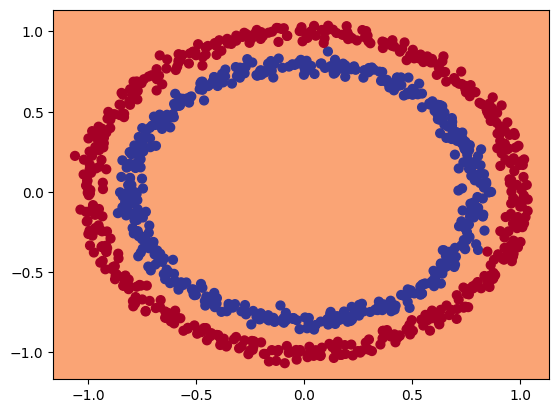

In [40]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)